# Machine Learning 2: House Price Prediction (2/3)

# The Plan
![](squirrel_plan.png)







### April
 
 1. Numeric Features for numeric prediction
 
### Today

 1. Quickly Recap Last time
 2. Work on engineering numeric features for numeric prediction
 
### The Future
 1. Engineered Categorical Features / Numeric Outputs (house-prices)
 4. Mixed Features / Binary Outputs (Titantic mortality)
 5. Mixed Features / Skewed Binary Outputs (Ad-Prediction)
 6. Big Data / Mixed Features / Skewed Binary Outputs (Ad-Prediction with EMR & S3)
 
### The Distant Future 
 1. Representation learning (e.g. deep neural-networks)

# Recap

In [15]:
import numpy as np
import scipy as sp
import scipy.linalg as la
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
x = np.array([1, 2, 3], dtype=np.float64)
y = np.array([2, 8, 18], dtype=np.int32)

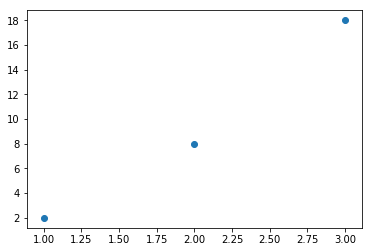

In [6]:
plt.scatter(x, y)

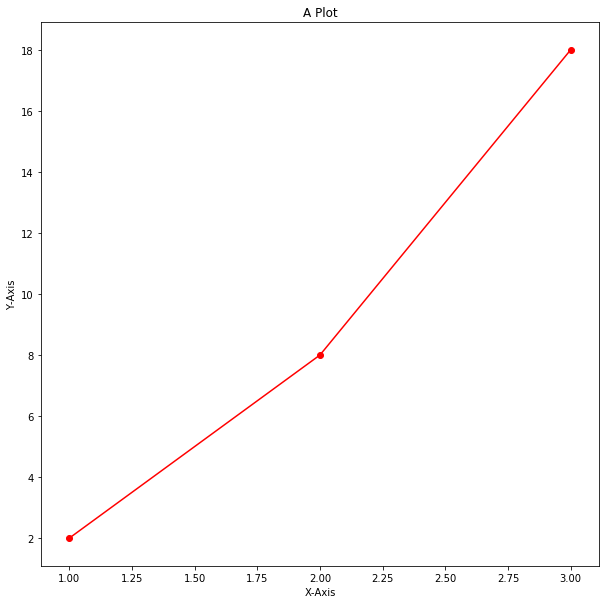

In [14]:
plt.figure(figsize=(10,10))
plt.title ("A Plot")
plt.plot(x, y, color="r", linestyle="-")
plt.scatter(x, y, color="r")

plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")

plt.show()

In [16]:
train_data = pd.read_csv("train.csv")

In [18]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
pd.set_option("display.max_columns", None)

In [20]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [25]:
train_data['SaleCondition'].head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [26]:
train_data.SaleCondition.head()

0     Normal
1     Normal
2     Normal
3    Abnorml
4     Normal
Name: SaleCondition, dtype: object

In [27]:
train_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

# Feature Selection and Simple Models

## Feature Selection

| Input       | Output  | Method      |
|-------------|---------|-------------|
| Numeric     | Numeric | Correlation |
| Binary      | Numeric | T-Test (!)  |
| Categorical | Numeric | ANOVA       |

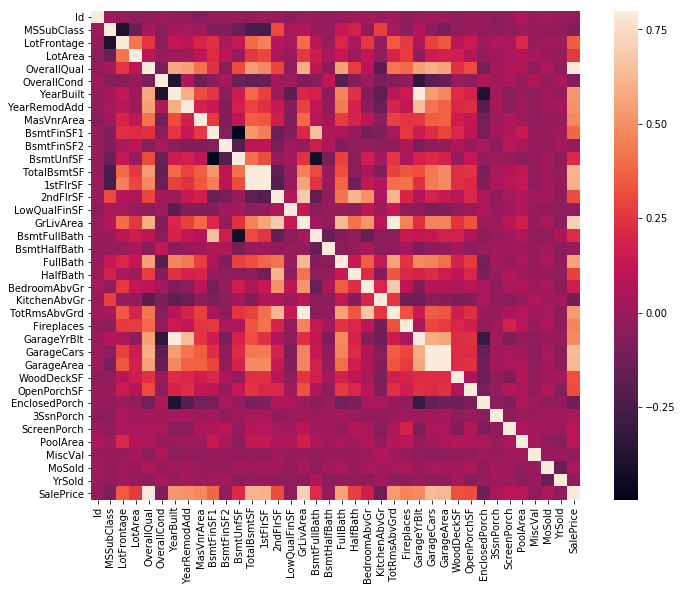

In [28]:
corr_matrix = train_data.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

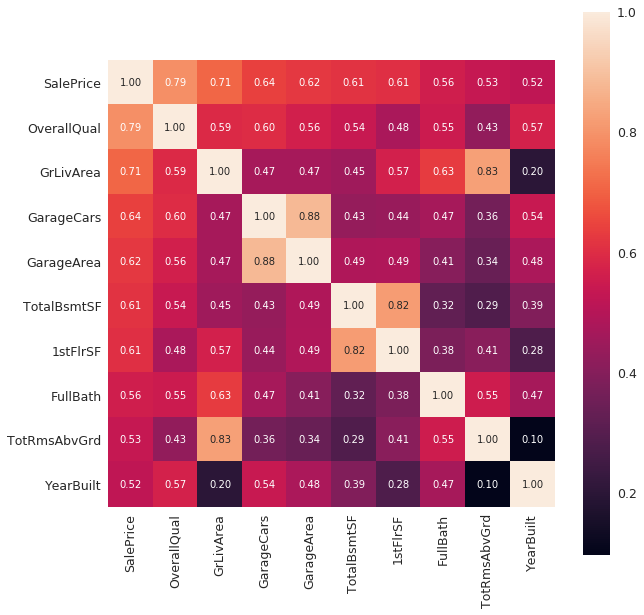

In [30]:
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(train_data[cols].values.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [32]:
cols = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    'FullBath',
    'YearBuilt']

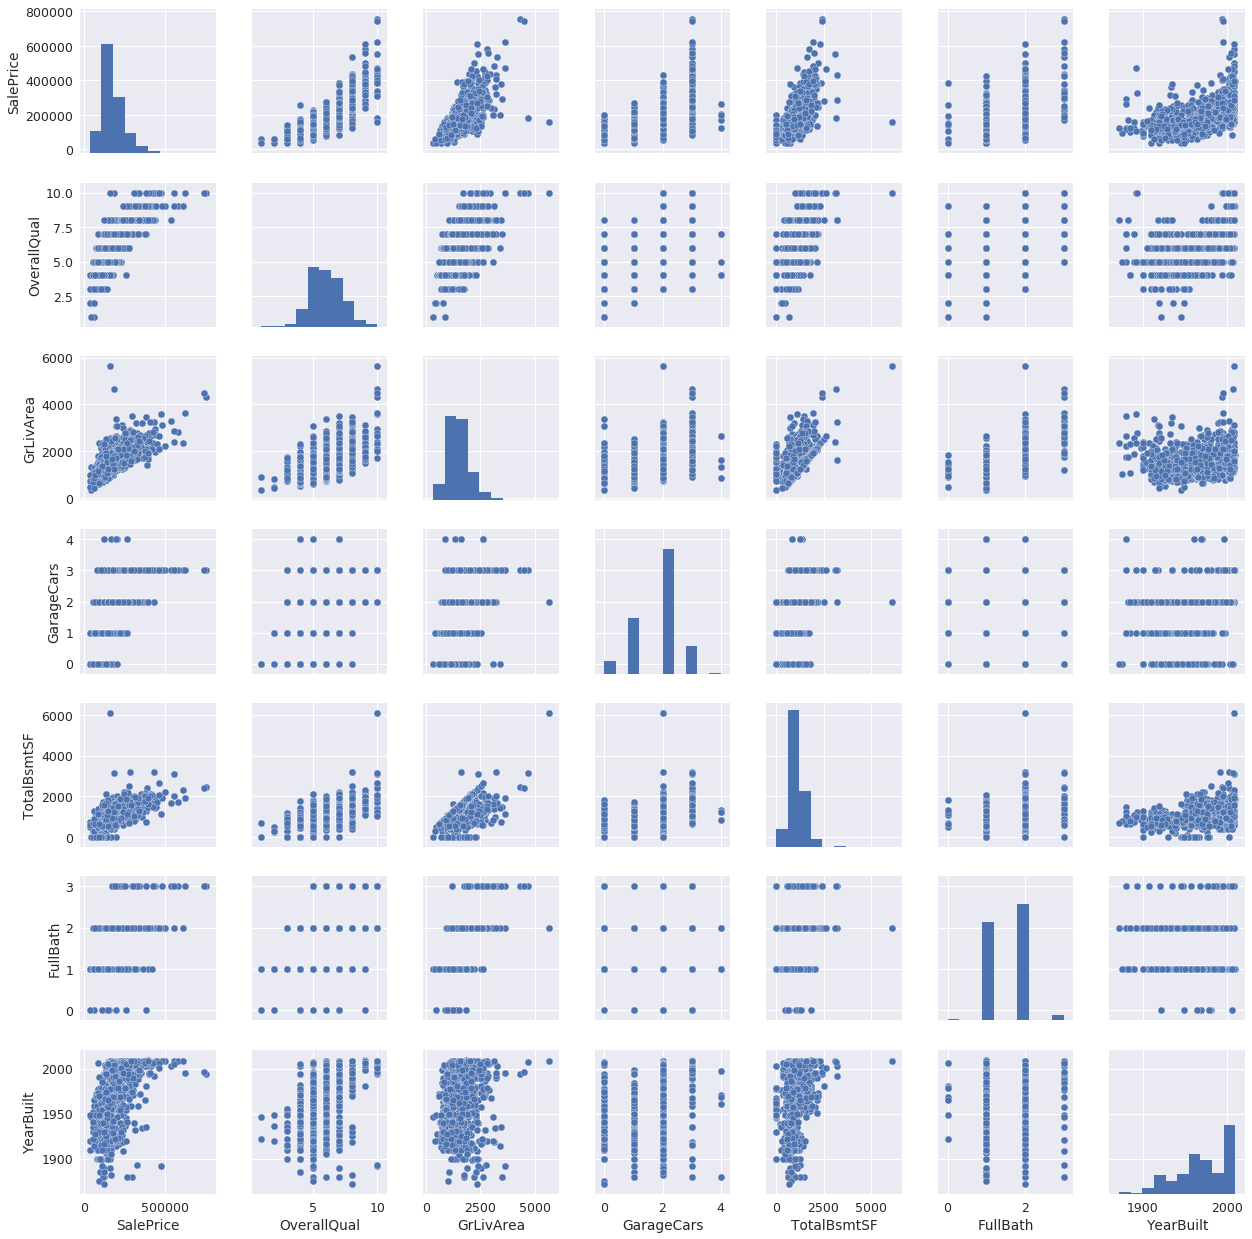

In [33]:
sns.pairplot(train_data[cols], size=2.5);

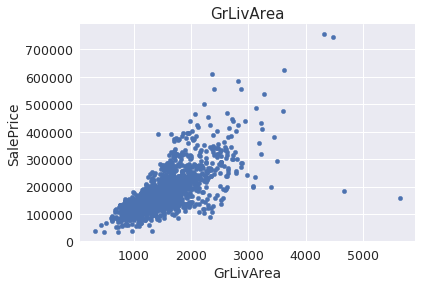

In [35]:
train_data.plot.scatter(x='GrLivArea', y='SalePrice', title='GrLivArea');

## Simple Model - Linear Regression

![title](what-is-linear-regression.png)

$$ y = w_0 + w_1 x_1 + w_2 x_2 + .... + w_d x_d \qquad$$

$$ \qquad\qquad = w_0 x_0  + w_1 x_1 + w_2 x_2 + .... + w_d x_d, \qquad x_0 = 1$$

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression(fit_intercept=True, normalize=True)

X_train, X_test = train_data[cols].iloc[0:1000, 1:], train_data[cols].iloc[1000:, 1:]
y_train, y_test = train_data[cols].iloc[0:1000, 0], train_data[cols].iloc[1000:, 0]

linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

43677.39674121954

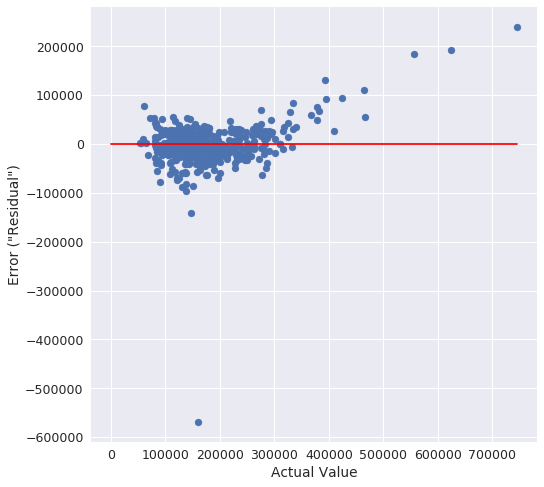

In [53]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_test - y_pred)
plt.plot([0,max(y_test)],[0,0], color="r")
plt.plot([0, ])
plt.xlabel("Actual Value")
plt.ylabel("Error (\"Residual\")");

# Feature Engineering

## First Consider the Target

/home/bryanfeeney/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


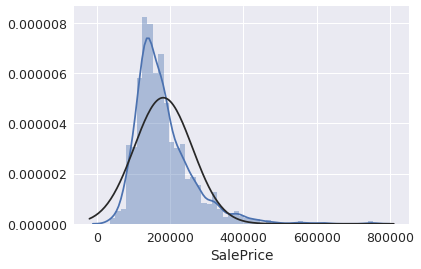

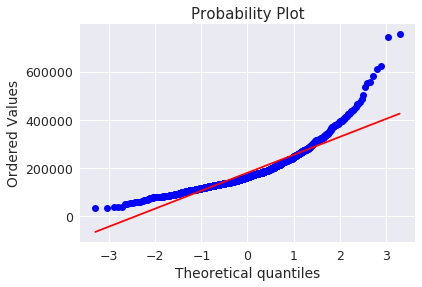

In [54]:
sns.distplot(train_data.SalePrice, fit=stats.norm);

fig = plt.figure()

res = stats.probplot(train_data.SalePrice, plot=plt)